In [36]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from numpy import median,mean
import math
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model,feature_selection,metrics
from sklearn.linear_model import Lasso

In [37]:
train_data = pd.read_csv('train.csv')
## Removed some rows. Part of Finding 1. Read at the end
train_data = train_data[(train_data['Id']!= 121) & (train_data['Id']!= 272) & (train_data['Id']!= 1276) & (train_data['Id']!= 1299)]
test_data = pd.read_csv('test.csv')

### 1. Data Exploration

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
Id               1456 non-null int64
MSSubClass       1456 non-null int64
MSZoning         1456 non-null object
LotFrontage      1198 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null object
Alley            91 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
Utilities        1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-n

In [39]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1456.000000,1456.000000,1198.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1448.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,730.468407,56.881868,69.823873,10452.458791,6.096841,5.575549,1971.271978,1984.870879,103.030387,440.031593,...,94.300824,46.498626,22.014423,3.329670,15.102335,2.436813,43.608516,6.324176,2007.817308,180924.756868
std,421.209246,42.334324,23.266676,9863.741881,1.380608,1.113395,30.219453,20.633702,179.946453,435.617571,...,125.422536,65.975514,61.192248,29.168897,55.828405,38.236092,496.799265,2.701277,1.328877,79525.542842
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,366.750000,20.000000,59.000000,7538.750000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,730.500000,50.000000,69.000000,9468.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.250000,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,165.250000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 1.1 Plotting Data for continuous vars

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
## House Price Stats
print("Housing Price Stats:\n")
print(train_data['SalePrice'].describe())
print("\nThe median of the Housing Price is: ", train_data['SalePrice'].median(axis = 0))

Housing Price Stats:

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
('\nThe median of the Housing Price is: ', 163000.0)


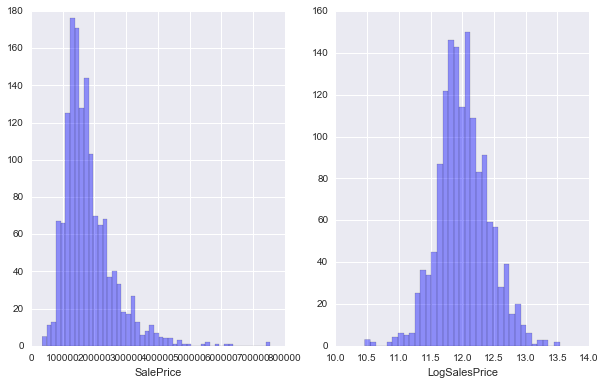

In [40]:
train_data['LogSalesPrice'] = np.log(train_data['SalePrice']+1)
f,axs = plt.subplots(1,2,figsize = (10,6))
sns.distplot(train_data['SalePrice'],kde = False,color= 'b',ax=axs[0])
sns.distplot(train_data['LogSalesPrice'],kde = False,color= 'b',ax=axs[1])  ## Will use log of sales as it makes the distribution normal

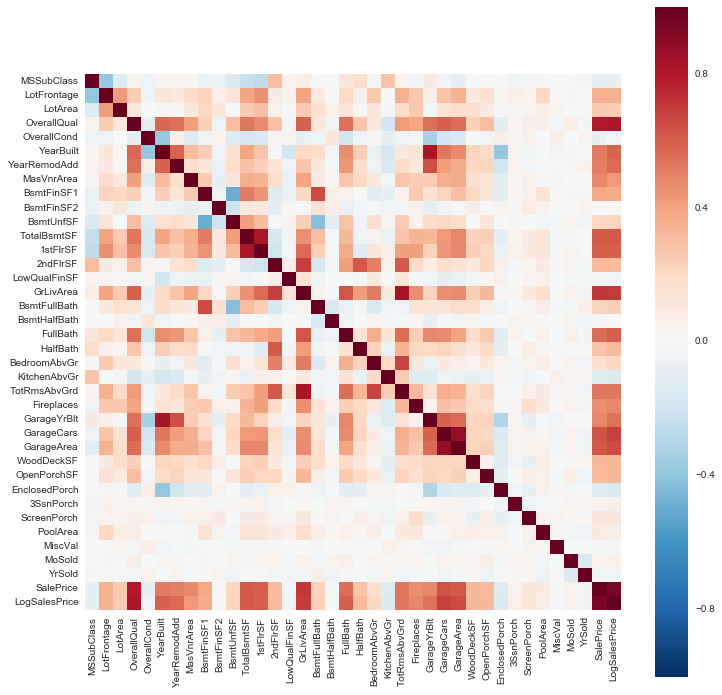

In [10]:
corr = train_data.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)
## For Better Visualization, export Corr Data to excel

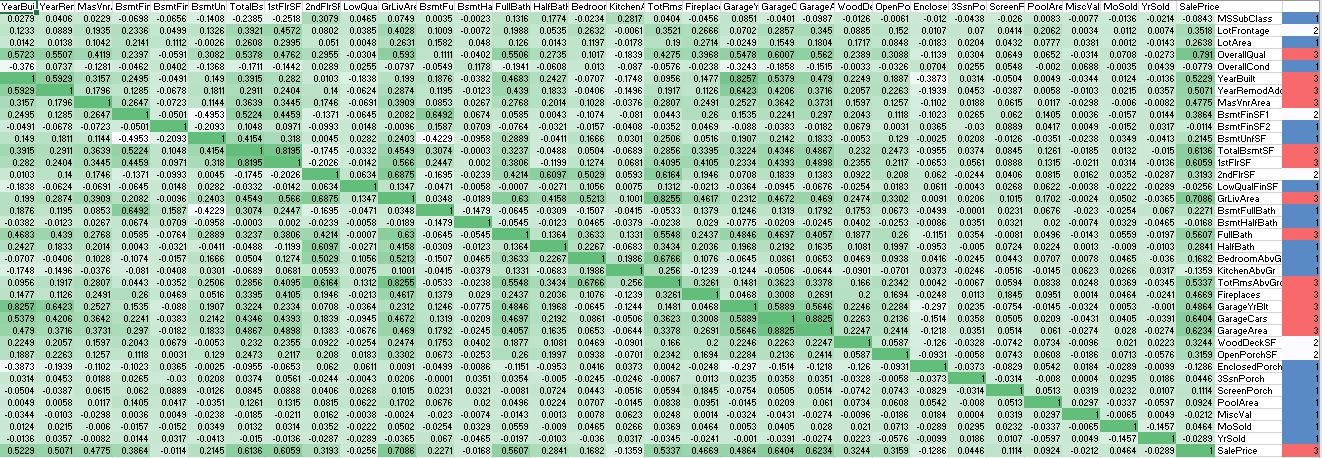

In [12]:
from IPython.display import Image
Image("Capture.JPG")

#### * In the above picture rightmost column gives color codes to the correlation value of features with respect to Sales. 3 is for values > .45 and 2 is for values > .3 *

#### Plotting highly correlated data (corr >.45)

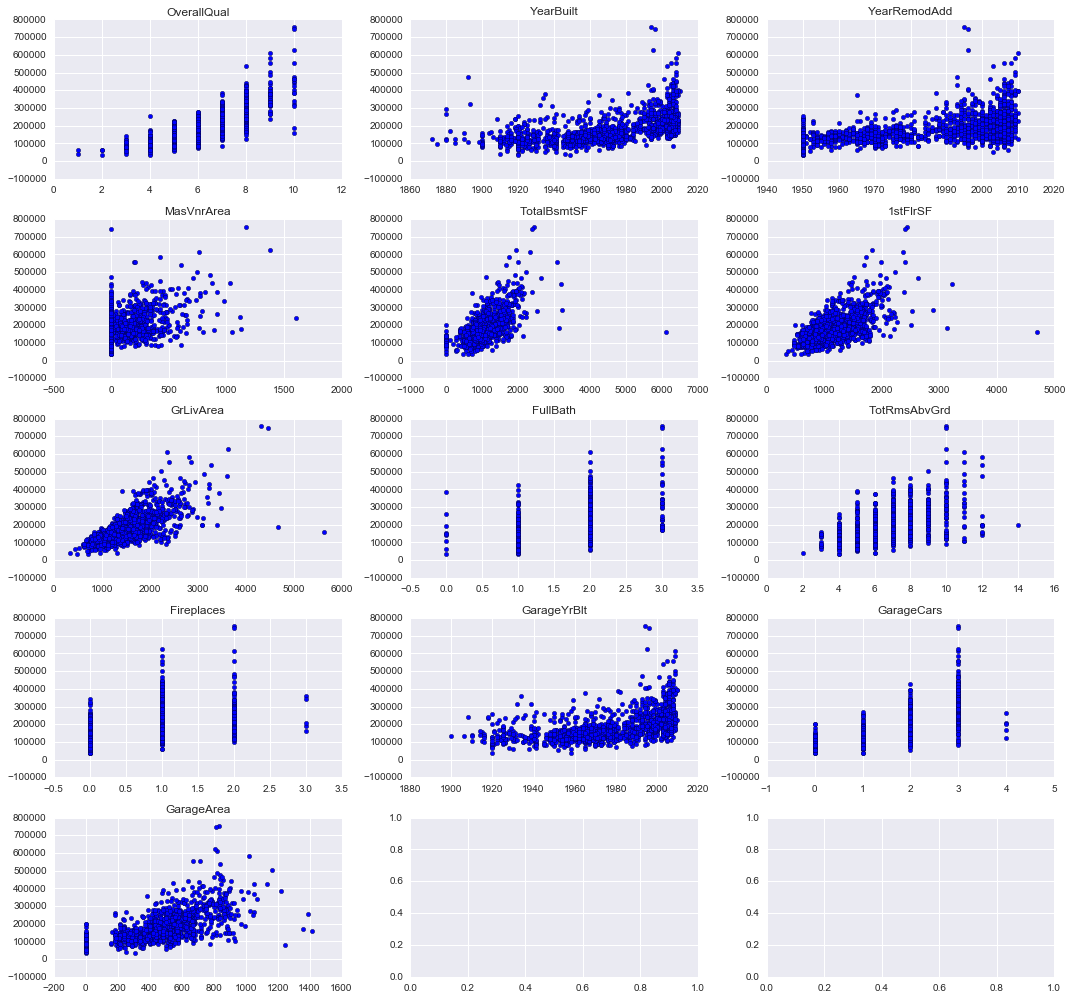

In [13]:
plt.figure(1)
f, axarr = plt.subplots(5, 3, figsize=(15, 14))
price = train_data['SalePrice']
features = ['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','1stFlrSF',
            'GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea']
i=0
j=0
for feature in features:
    axarr[i, j].scatter(train_data[feature], price)
    axarr[i, j].set_title(feature)
    if j==2:
        i=i+1
        j=0
    else:
        j=j+1
plt.tight_layout()


### 1.2 Univariate analysis for Categorical data

In [14]:
cat_var= train_data.select_dtypes(include = ['object']).columns.values

In [15]:
## Function for plots for Categorical Vals
def plotter(feature):
    f, axarr = plt.subplots(1, 3, figsize=(14, 6)) 
    sns.boxplot(x = feature, y = 'SalePrice',  data = train_data,ax=axarr[0])
    axarr[0].set_title('BOXPLOT')
    sns.barplot(x=feature, y="SalePrice",  data=train_data,ax=axarr[1],estimator=median)
    axarr[1].set_title('BARPLOT - MEDIAN')
    sns.barplot(x=feature, y="SalePrice",  data=train_data,ax=axarr[2],estimator=mean)
    axarr[2].set_title('BARPLOT - MEAN')
    plt.suptitle(feature,size=16,x=0,y=1)
    #plt.subplots_adjust(top=0.85)
    plt.tight_layout()
#xt = plt.xticks(rotation=45)

C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


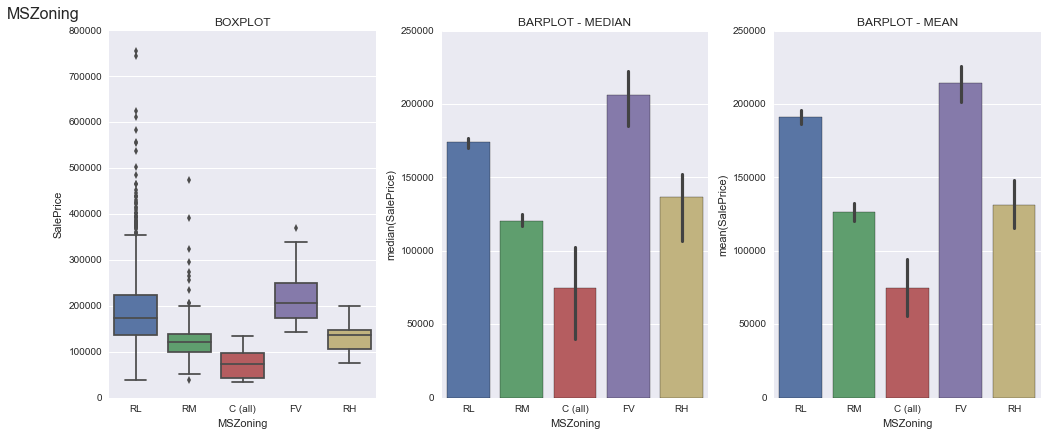

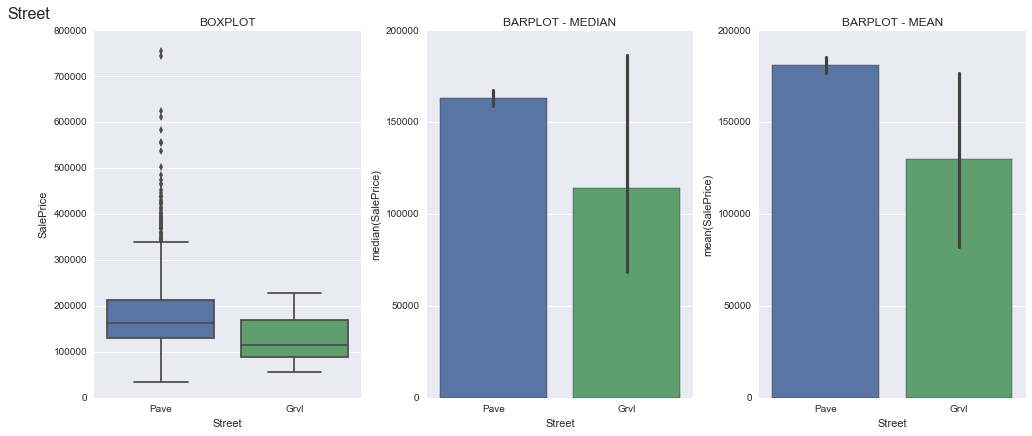

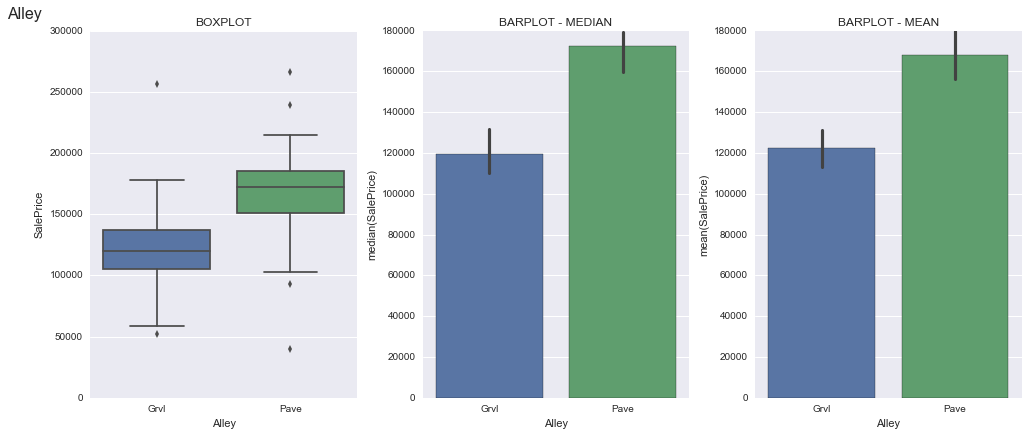

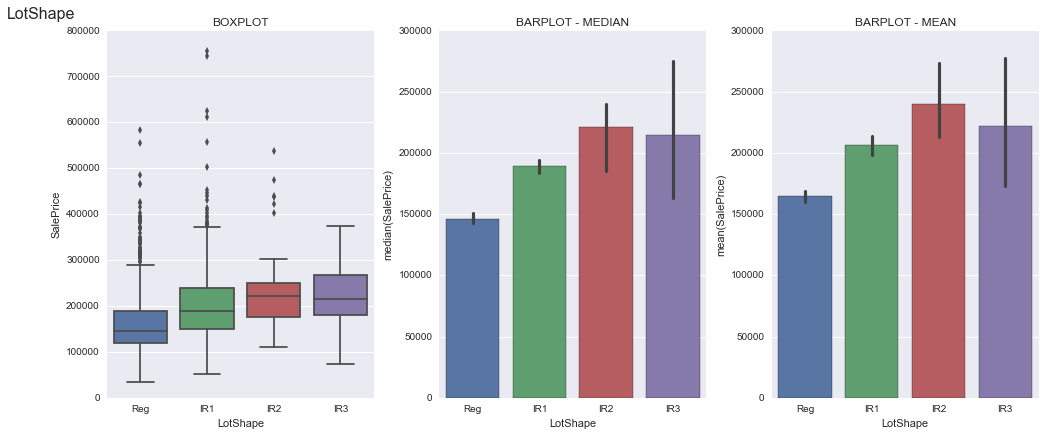

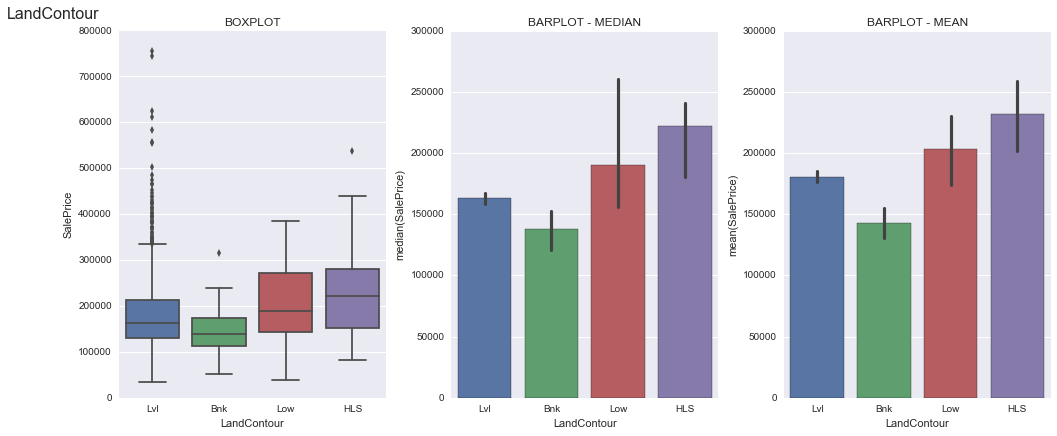

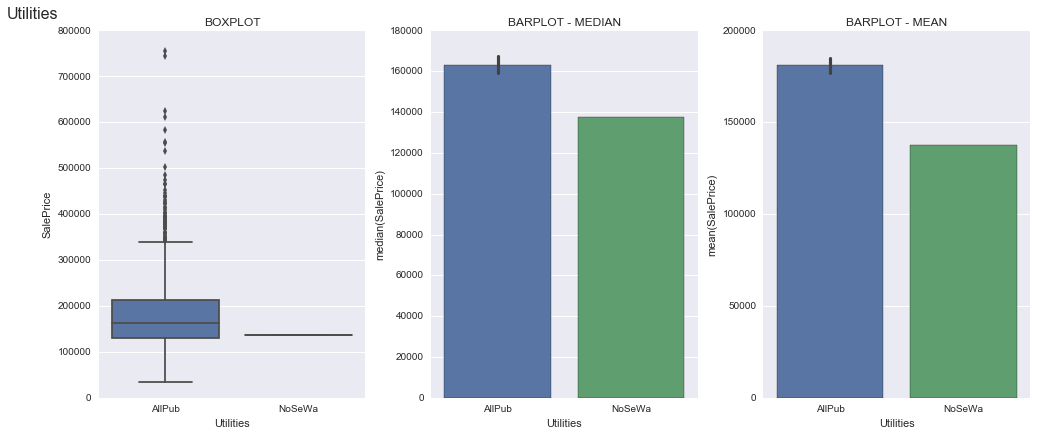

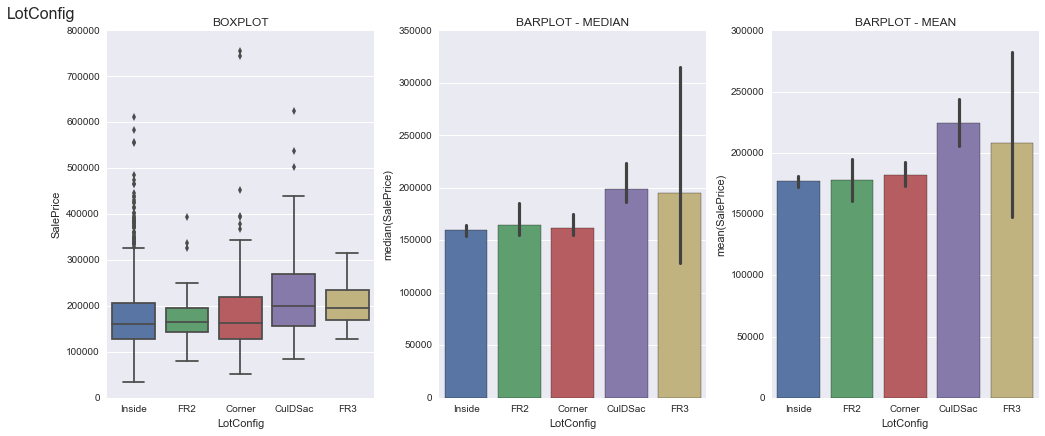

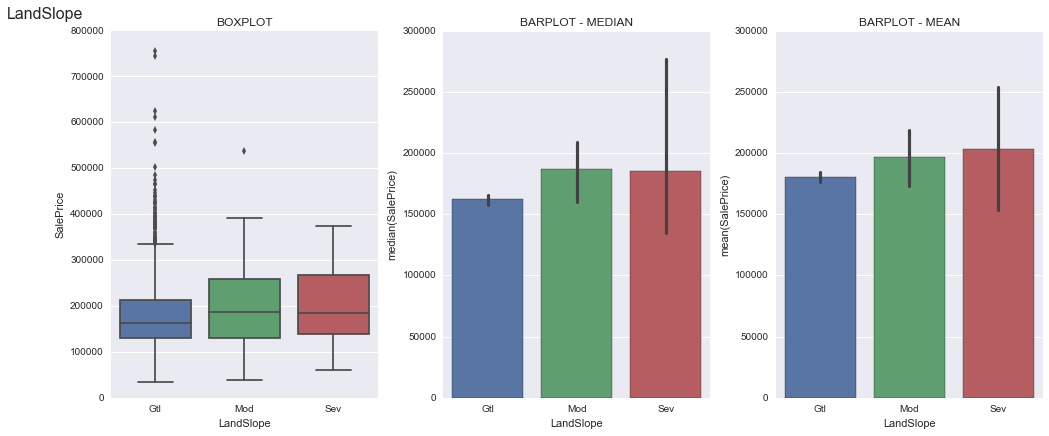

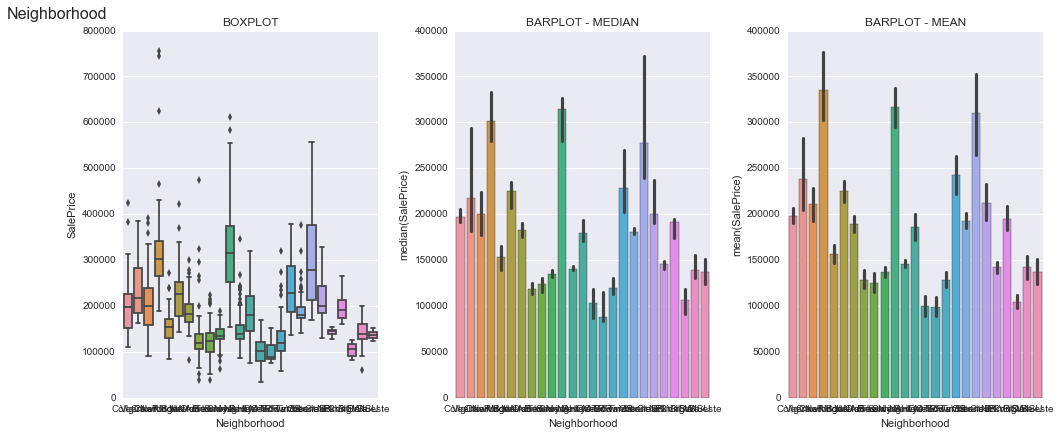

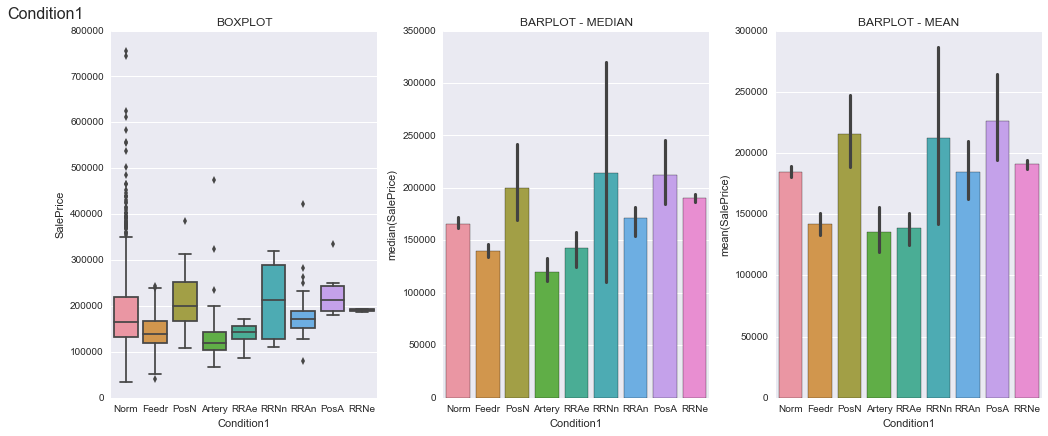

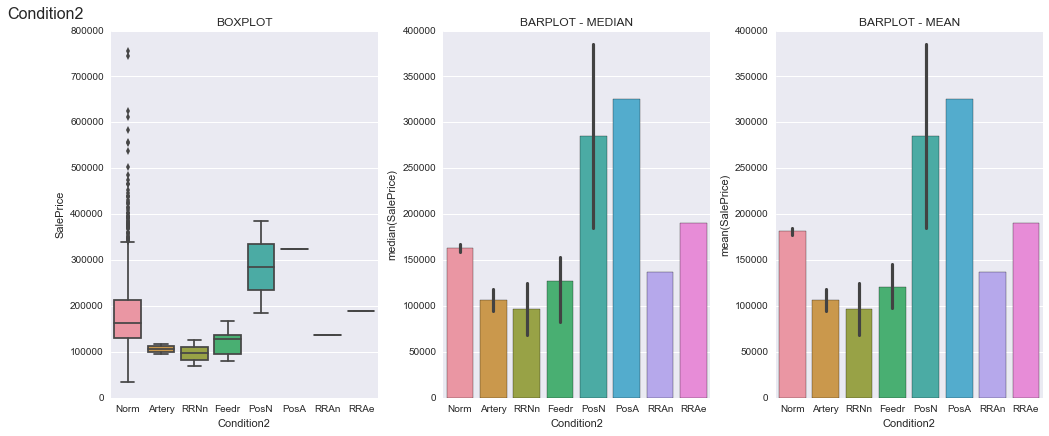

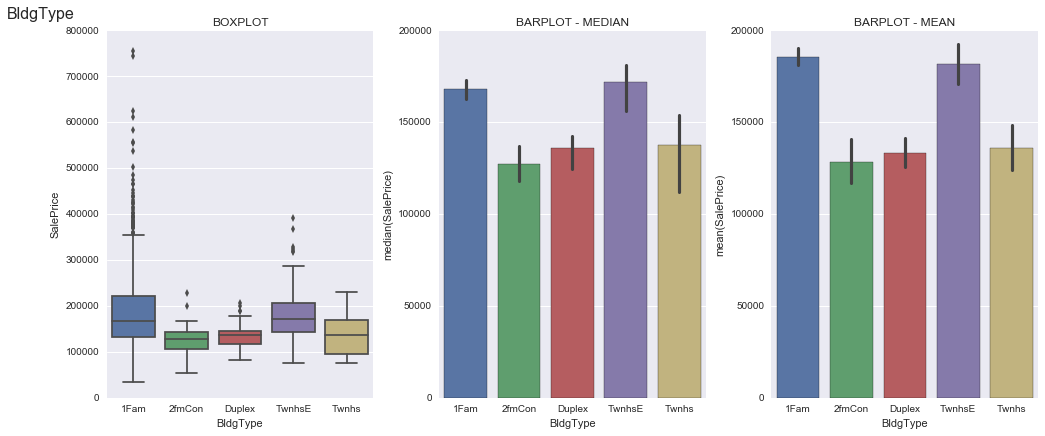

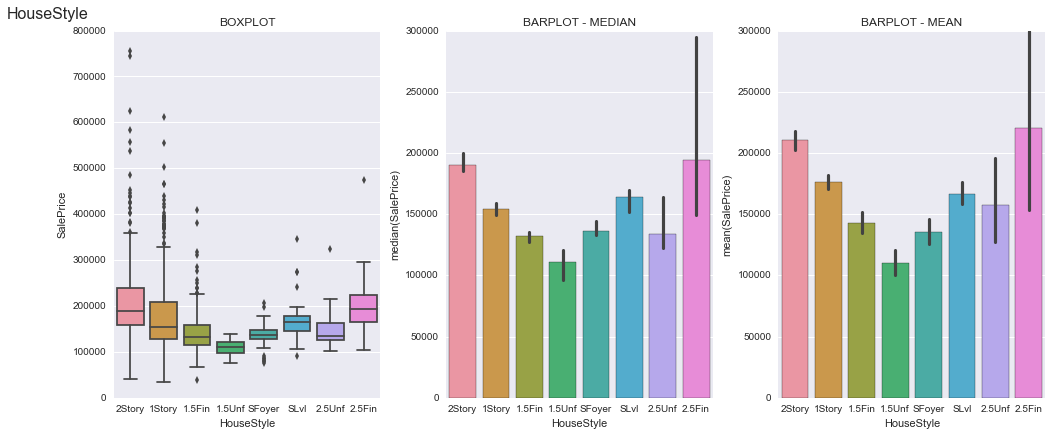

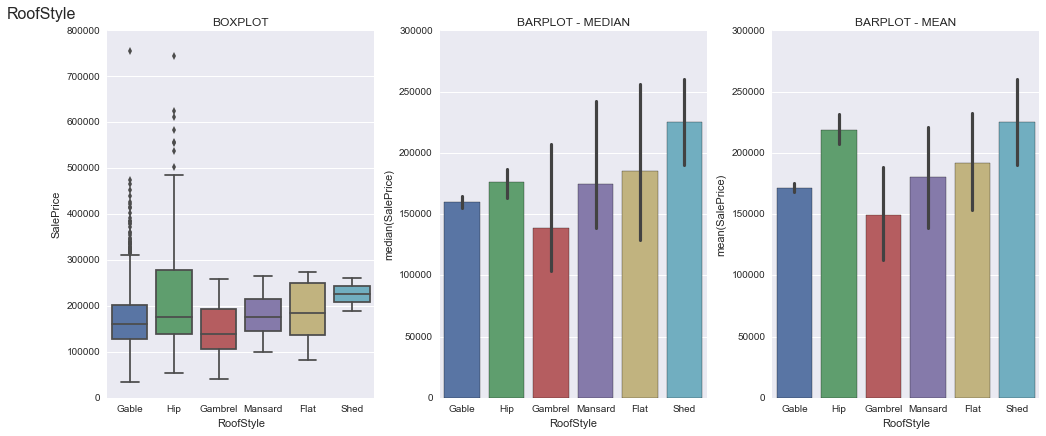

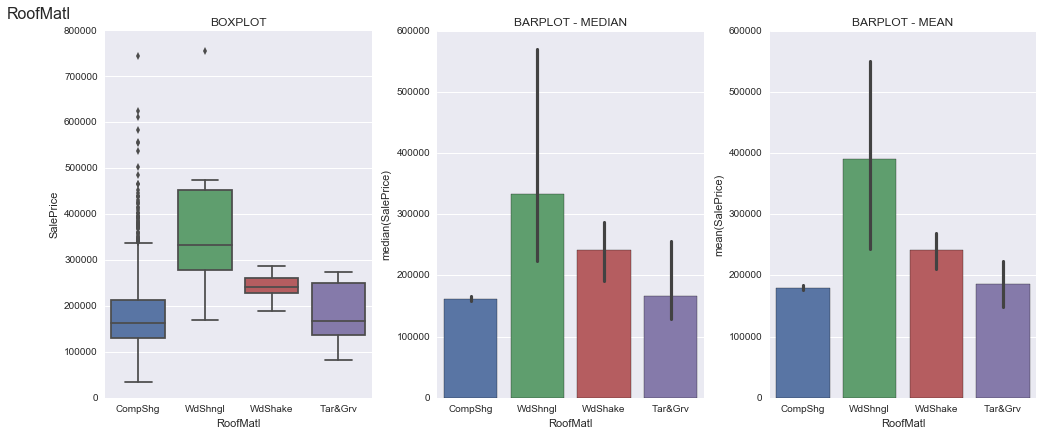

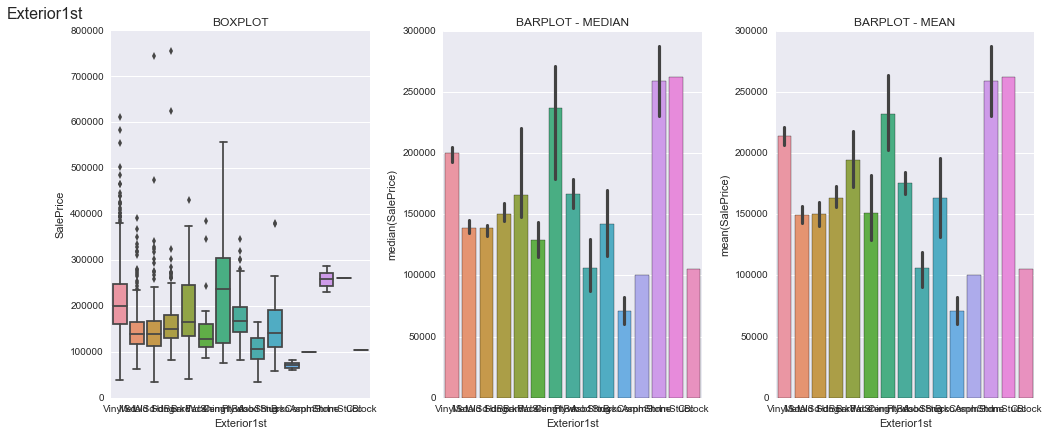

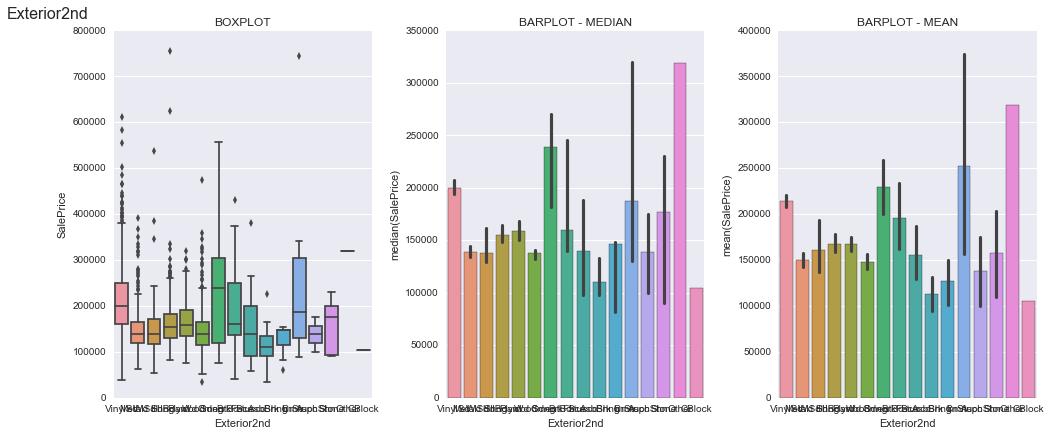

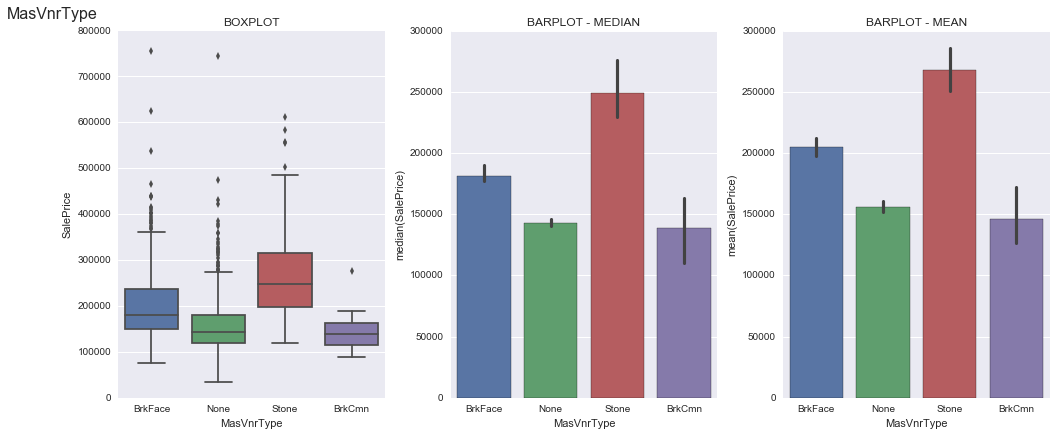

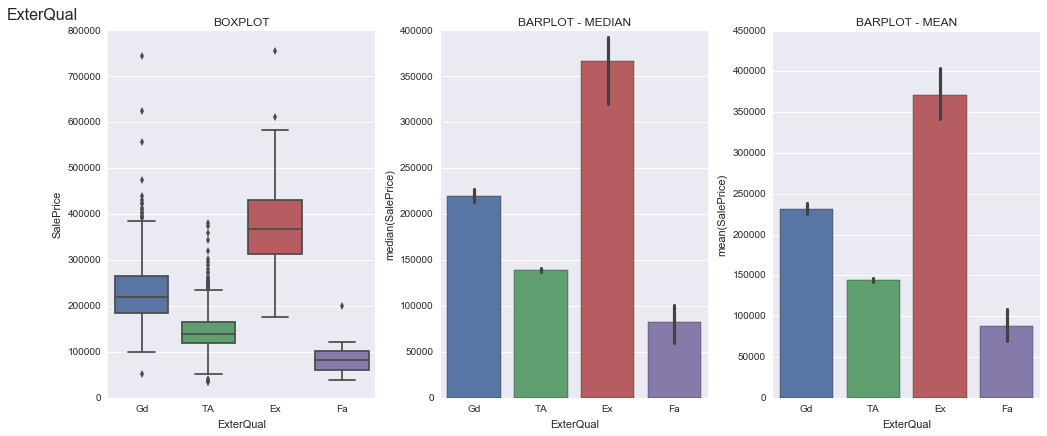

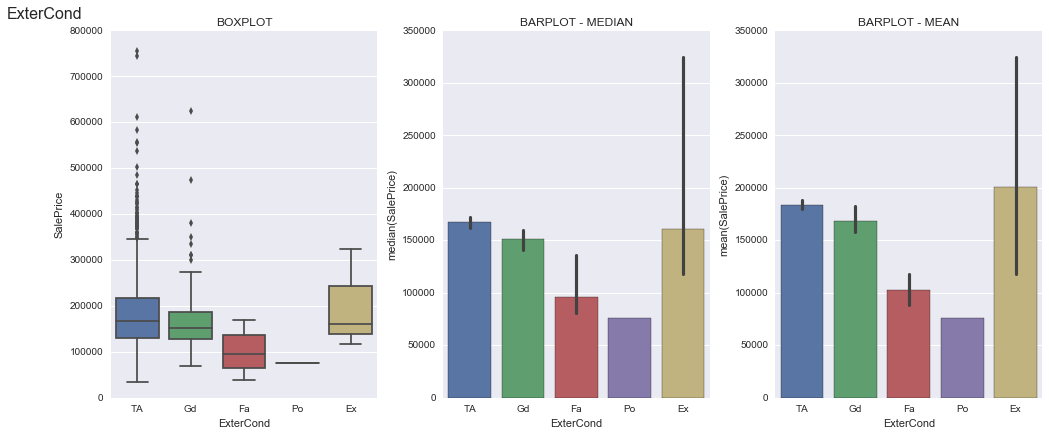

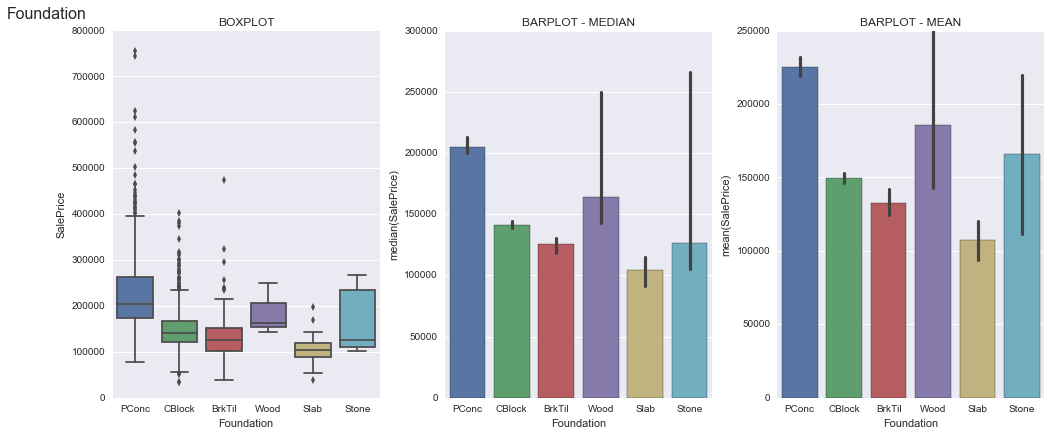

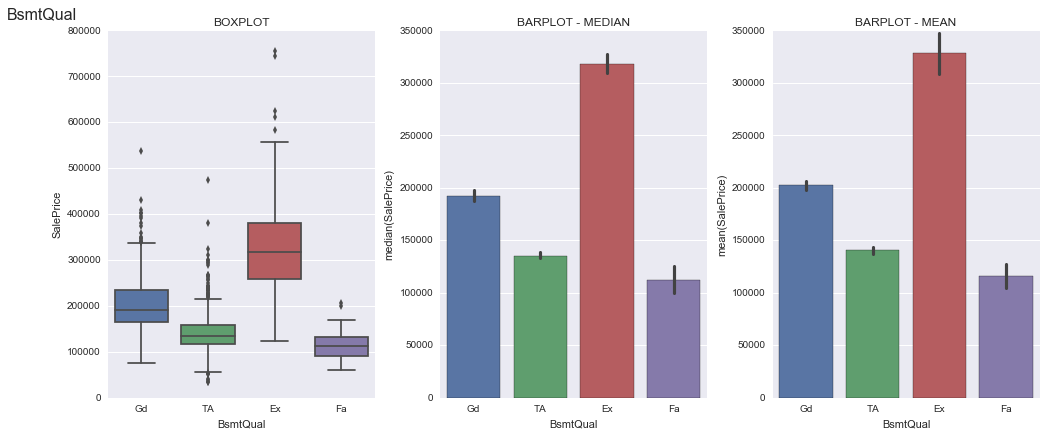

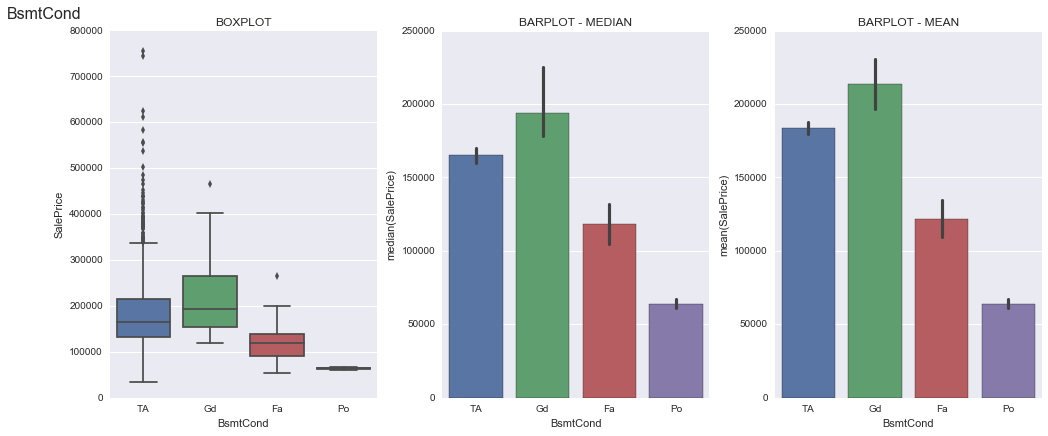

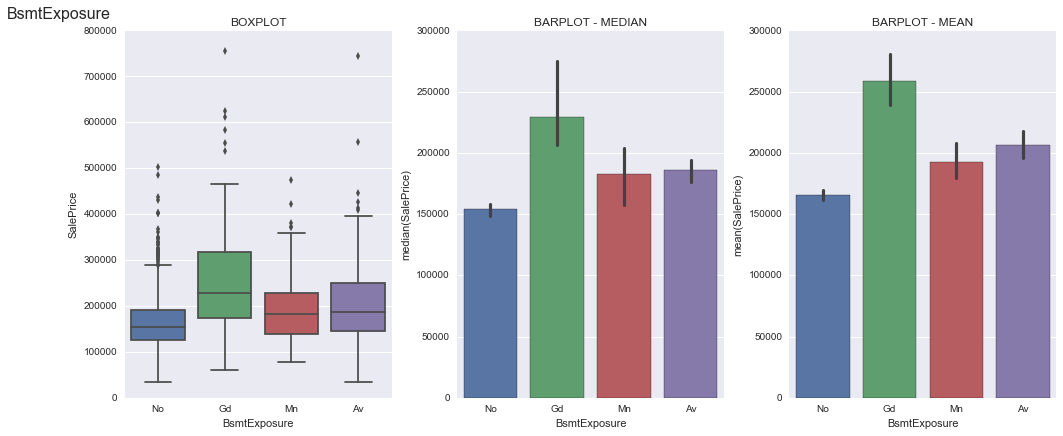

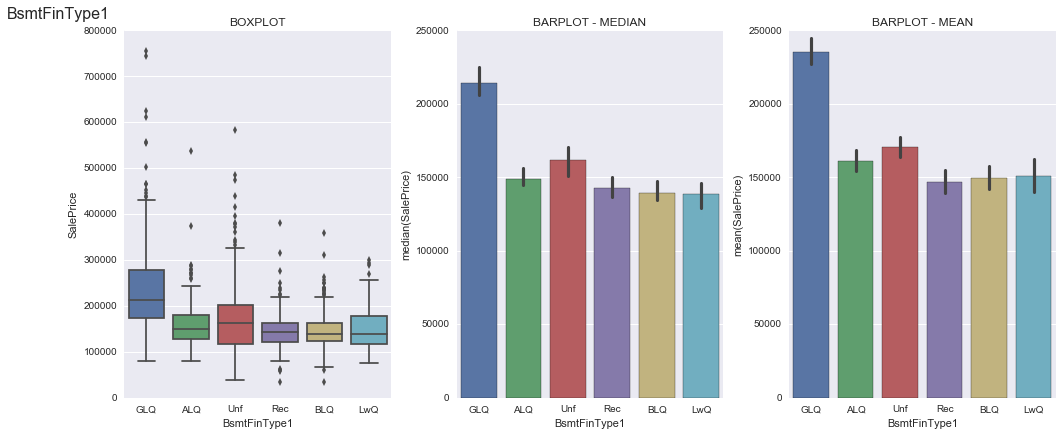

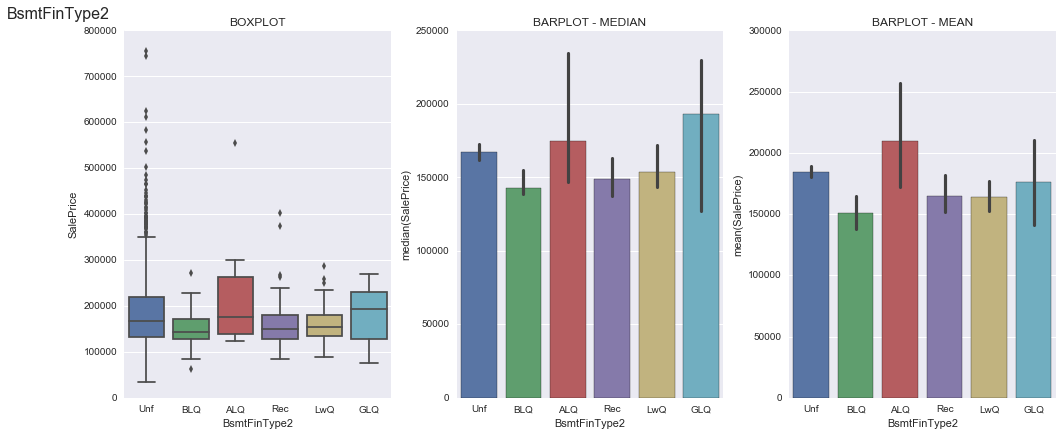

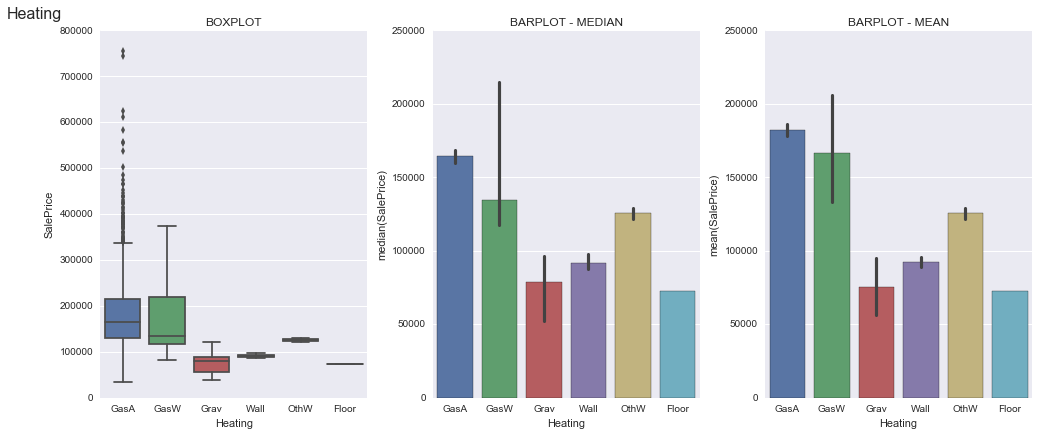

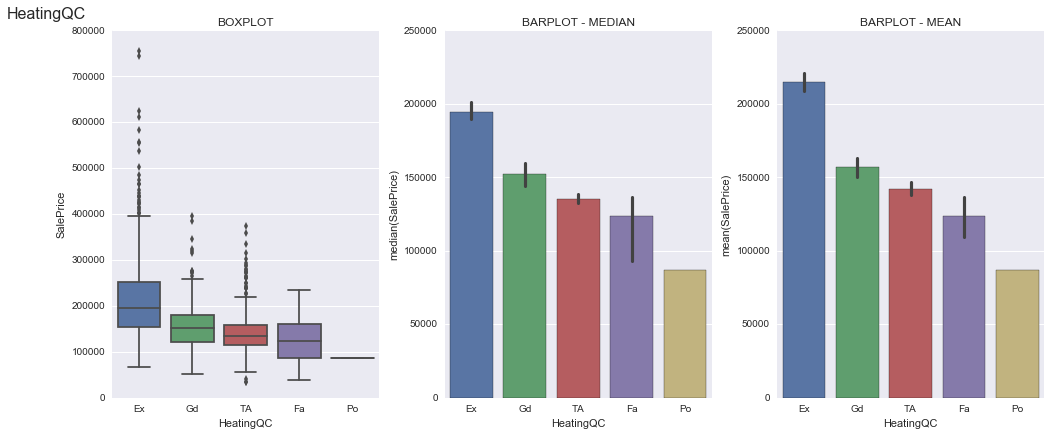

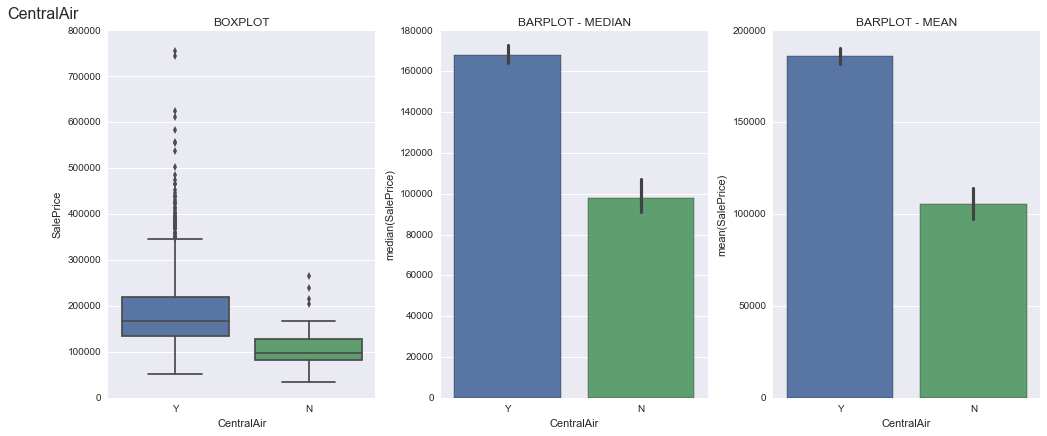

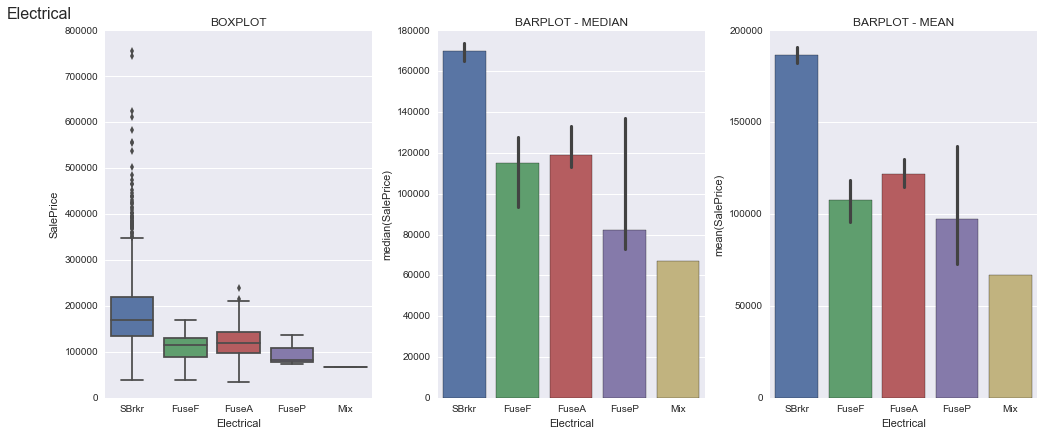

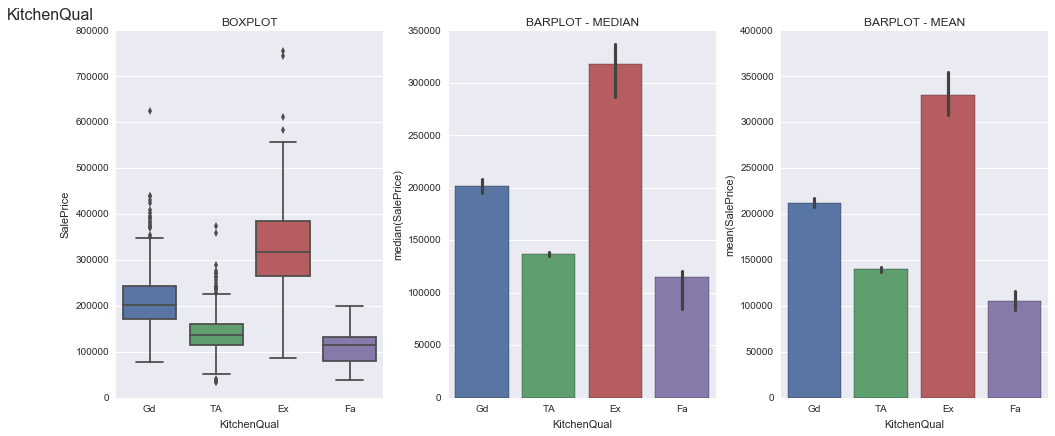

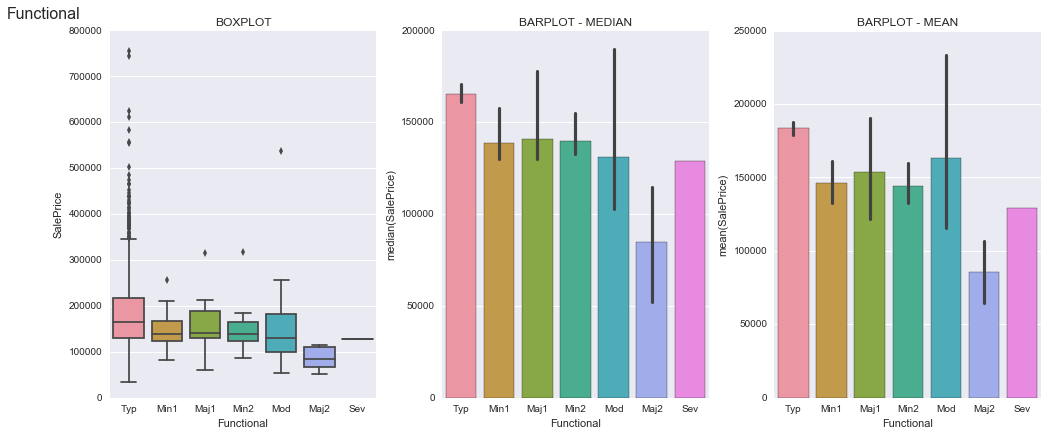

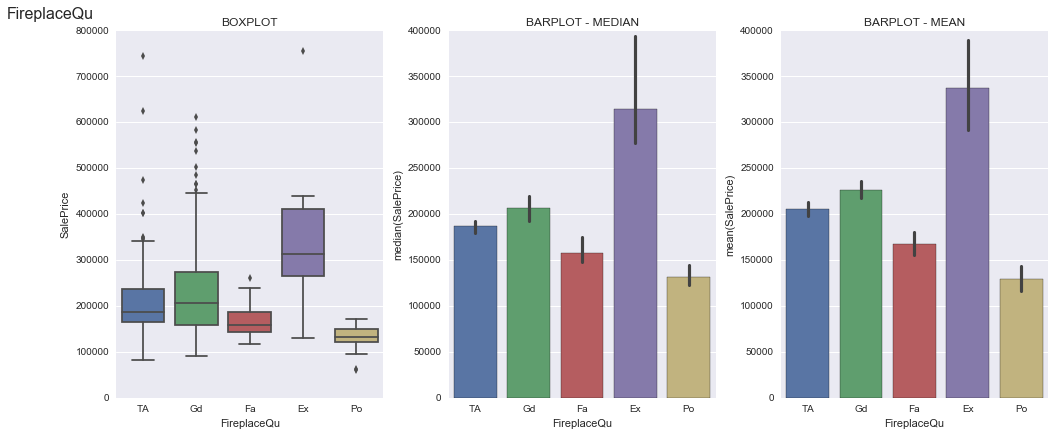

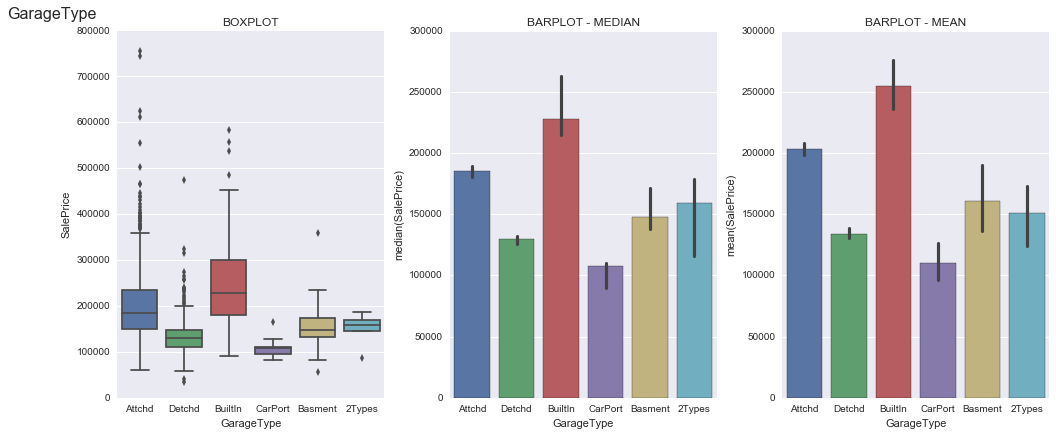

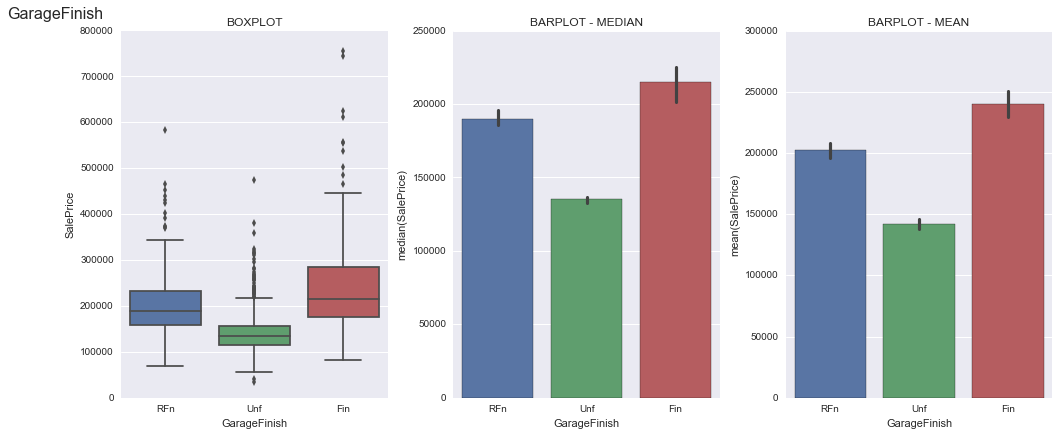

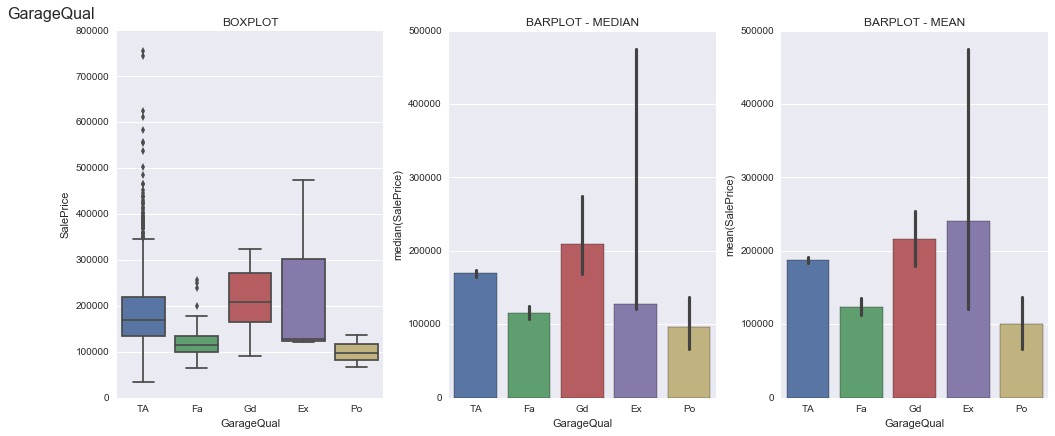

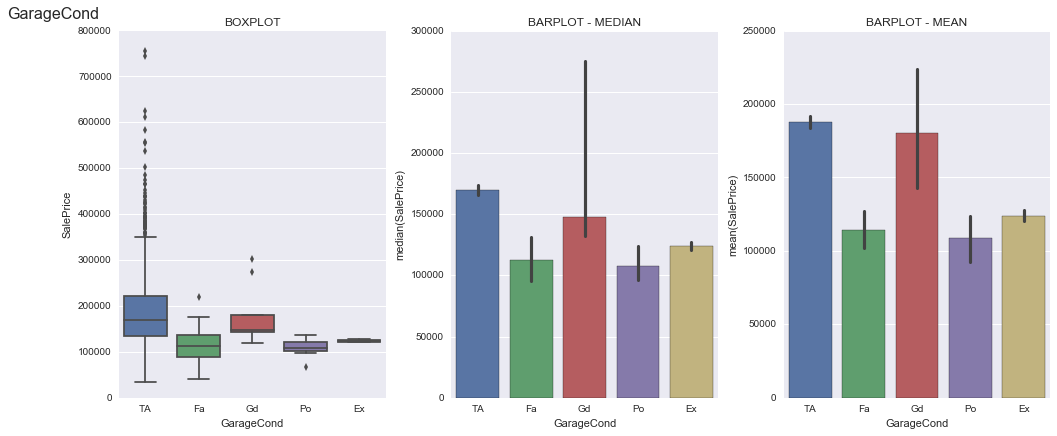

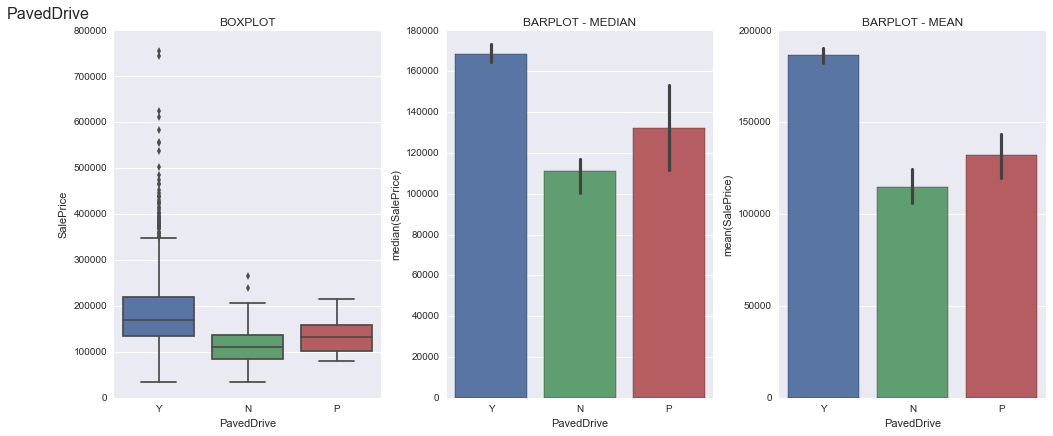

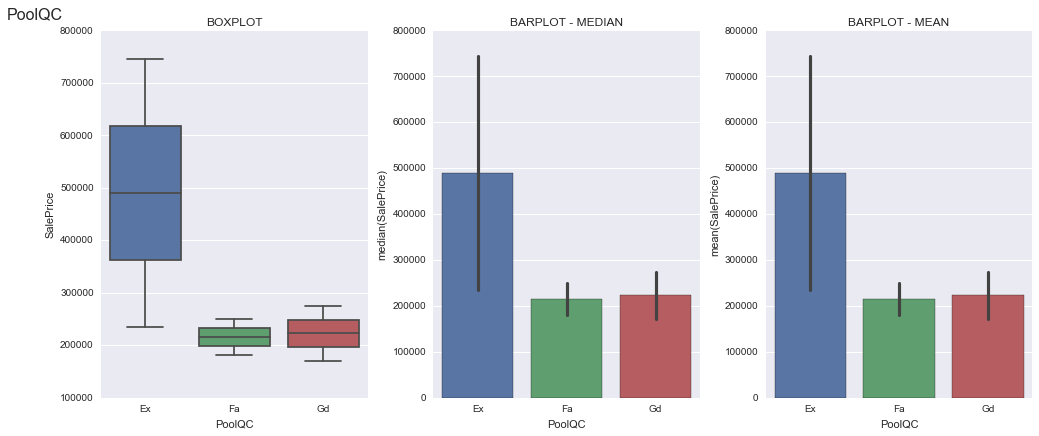

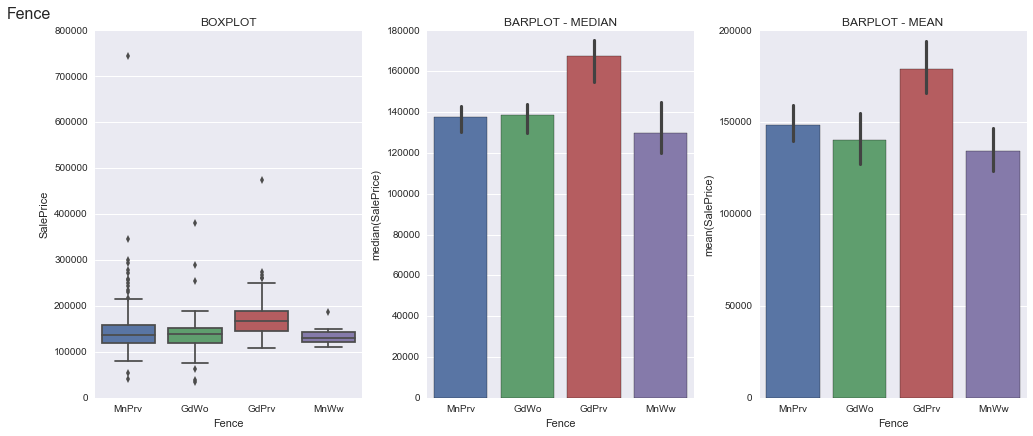

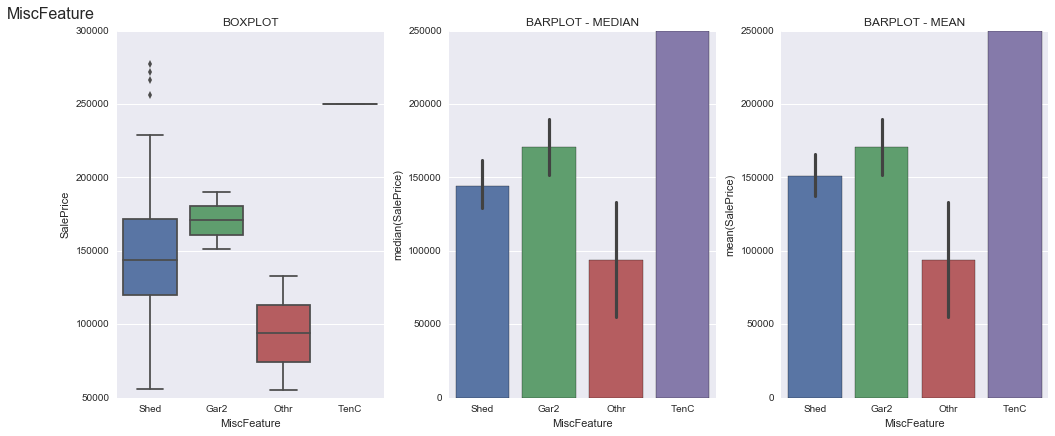

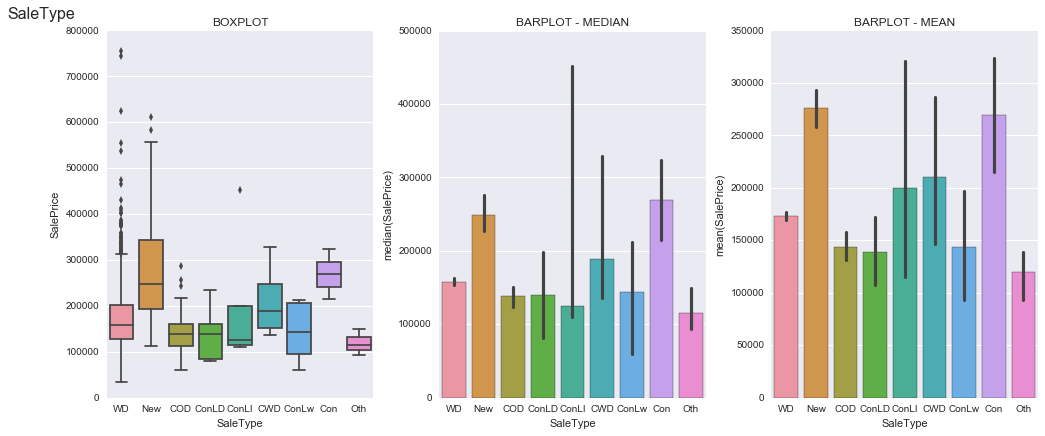

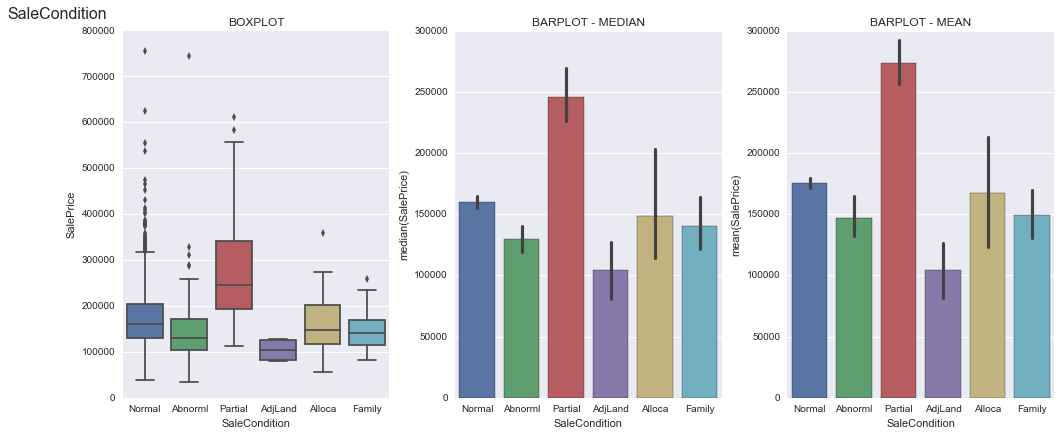

In [55]:
## Will not be plotting this as there a lot of variables. But can be run using following code
for i in cat_var:
    
    plotter(i)

### 2. Preprocessing

In [41]:
## Combine train and test for preprocessing and feature engineering. Sales Price and Log Sales Price removed from train

full_data = pd.concat([train_data.drop(['SalePrice','LogSalesPrice'],axis=1),test_data]) 


In [42]:
# Compute skewness for continuous vars and taking log for skewness >.75

sked = full_data.select_dtypes(include = ['int64','float64']).columns
l = len(sked)
for col in range(len(sked)):
    if skew(full_data[sked[col]].dropna())>.75:
        print sked[col] , ':', skew(full_data[sked[col]].dropna()) ## Print skewed data
        full_data[sked[col]] = np.log(full_data[sked[col]]+1)



MSSubClass : 1.37622000839
LotFrontage : 1.12259025437
LotArea : 13.1152079899
MasVnrArea : 2.60919191332
BsmtFinSF1 : 0.99139123861
BsmtFinSF2 : 4.15098472997
BsmtUnfSF : 0.918924789253
1stFlrSF : 1.28072460025
2ndFlrSF : 0.863106159611
LowQualFinSF : 12.080315112
GrLivArea : 1.12835776448
BsmtHalfBath : 3.9267983022
KitchenAbvGr : 4.31721222833
TotRmsAbvGrd : 0.751774246536
WoodDeckSF : 1.84241012638
OpenPorchSF : 2.54059103458
EnclosedPorch : 4.00079639017
3SsnPorch : 11.4796542373
ScreenPorch : 3.94350811406
PoolArea : 17.6825417236
MiscVal : 21.9321469536


In [43]:
# Create Dummies
full_data =pd.get_dummies(full_data)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 0 to 1458
Columns: 285 entries, Id to SaleCondition_Partial
dtypes: float64(274), int64(11)
memory usage: 6.4 MB


In [44]:
# Imputing Nulls
full_data = full_data.fillna(full_data.mean())

In [45]:
# Get Train Data
train = full_data[:train_data.shape[0]].drop(['Id','GarageYrBlt','LotShape_IR2'],axis=1) ##(Part of Finding 2. Read at the end)
## These three fields are removed as they had low coef in initial run of lasso 
test = full_data[train_data.shape[0]:]
target = train_data['LogSalesPrice']


## 3. Models

### 3.1 Lasso (1st version with all features and rows)

In [46]:
# Returns CV score
def cv_score(model):
    return cross_val_score(model,train,target,cv=10,scoring = 'mean_squared_error').mean()

In [47]:
alpha_lasso = [0,0.00005,0.0001,.0002,.0003,.0005,.001]
lasso_mse = []
for i in alpha_lasso:
    lasso_mse.append(-cv_score(Lasso(i)))
lasso_ser = pd.Series(lasso_mse,alpha_lasso)

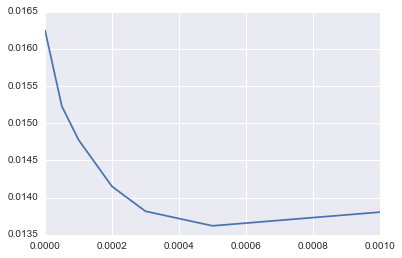

In [48]:
lasso_ser.plot()

### * We get min mse at alpha = .0005*

In [49]:
reg = Lasso(alpha = .0005)

In [50]:
reg.fit(train,target)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
a = pd.Series(abs(reg.coef_),index = list(train.columns.values))
## Features with coeff not equal to 0
lasso_feat = list(a[a>0].index)

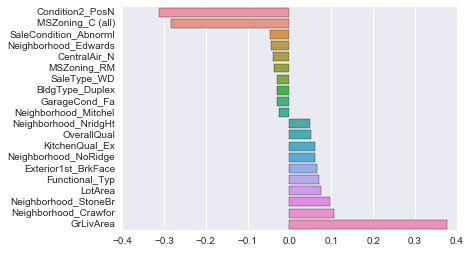

In [52]:
# Most important features according to lasso
coef = pd.Series((reg.coef_),index = list(train.columns.values))
coef_lasso = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
sns.barplot(x=coef_lasso, y=coef_lasso.index)

In [53]:
lasso_features = train.columns.values
test['SalePrice']=reg.predict(test[lasso_features])
test['SalePrice'] = test['SalePrice'].apply(lambda x : math.exp(x))

C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\PolestarEmployee\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [54]:
submission = test[['Id','SalePrice']]
submission.to_csv('submission.csv',index=False)

### Using the above logic, score : 0.12007

### Finding 0 : By not removing the rows and features got a score of 0.12228

### Finding 1 : The feature with highest negative coef when no feature is dropped is 'RoofMatl_ClyTile'. There was only one row in the whole data (train + test) for RoofMatl = ClyTile. Similarly there was 1 row for 3 other values of RoofMatl as well. After removing these rows and rerunning lasso it gave me a score of 0.12071

### Finding 2 : Also, features Remove 'Id','GarageYrBlt','LotShape_IR2' had very low coeff in initial run of lasso. (In the order of E-06). So after removing these feature from train and test data, it gave me a better score of 0.12007


### Things tried and their score:
#### 1. Ridge Reg on Features reduced from Lasso : 0.12423 (This is without removing rows or features. It is an increase over error of lasso with all features and rows : 0.12228)
#### 2. Lasso Reg	All Features  + Neighborhood Bucket	: 0.12333 (Neighborhood bucket (classes) was made according to the median value of Sales price in that region. This actually increased the error. Shocking!)
#### 3. Lasso Reg remove Ids 121,272,1276,1299 due to reason from finding 2 : 	0.12071

#### 4. Lasso Reg after removing rows in above point and 'Id','GarageYrBlt','LotShape_IR2' as they had low coeff in initial run of lasso	0.12007

Also tried Linear regression on Lasso Features. It did not perform well.


### Confusion : 
####  Why does the coef of RoofMatl_ClyTile was highly negative eventhough it had only 1 row in the data.